In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math

In [4]:
df3 = pd.read_csv('/Users/emanuele/Desktop/HPC_ex1/scatter3_fixed_core.csv')
df2 = pd.read_csv('/Users/emanuele/Desktop/HPC_ex1/scatter2_fixed_core.csv')
df0 = pd.read_csv('/Users/emanuele/Desktop/HPC_ex1/scatter0_fixed_core.csv')
df1 = pd.read_csv('/Users/emanuele/Desktop/HPC_ex1/scatter1_fixed_core.csv')

In [5]:
b_df0 = pd.read_csv('/Users/emanuele/Desktop/HPC_ex1/bcast0_fixed_core.csv')
b_df1 = pd.read_csv('/Users/emanuele/Desktop/HPC_ex1/bcast1_fixed_core.csv')
b_df3 = pd.read_csv('/Users/emanuele/Desktop/HPC_ex1/bcast3_fixed_core.csv')
b_df5 = pd.read_csv('/Users/emanuele/Desktop/HPC_ex1/bcast5_fixed_core.csv')

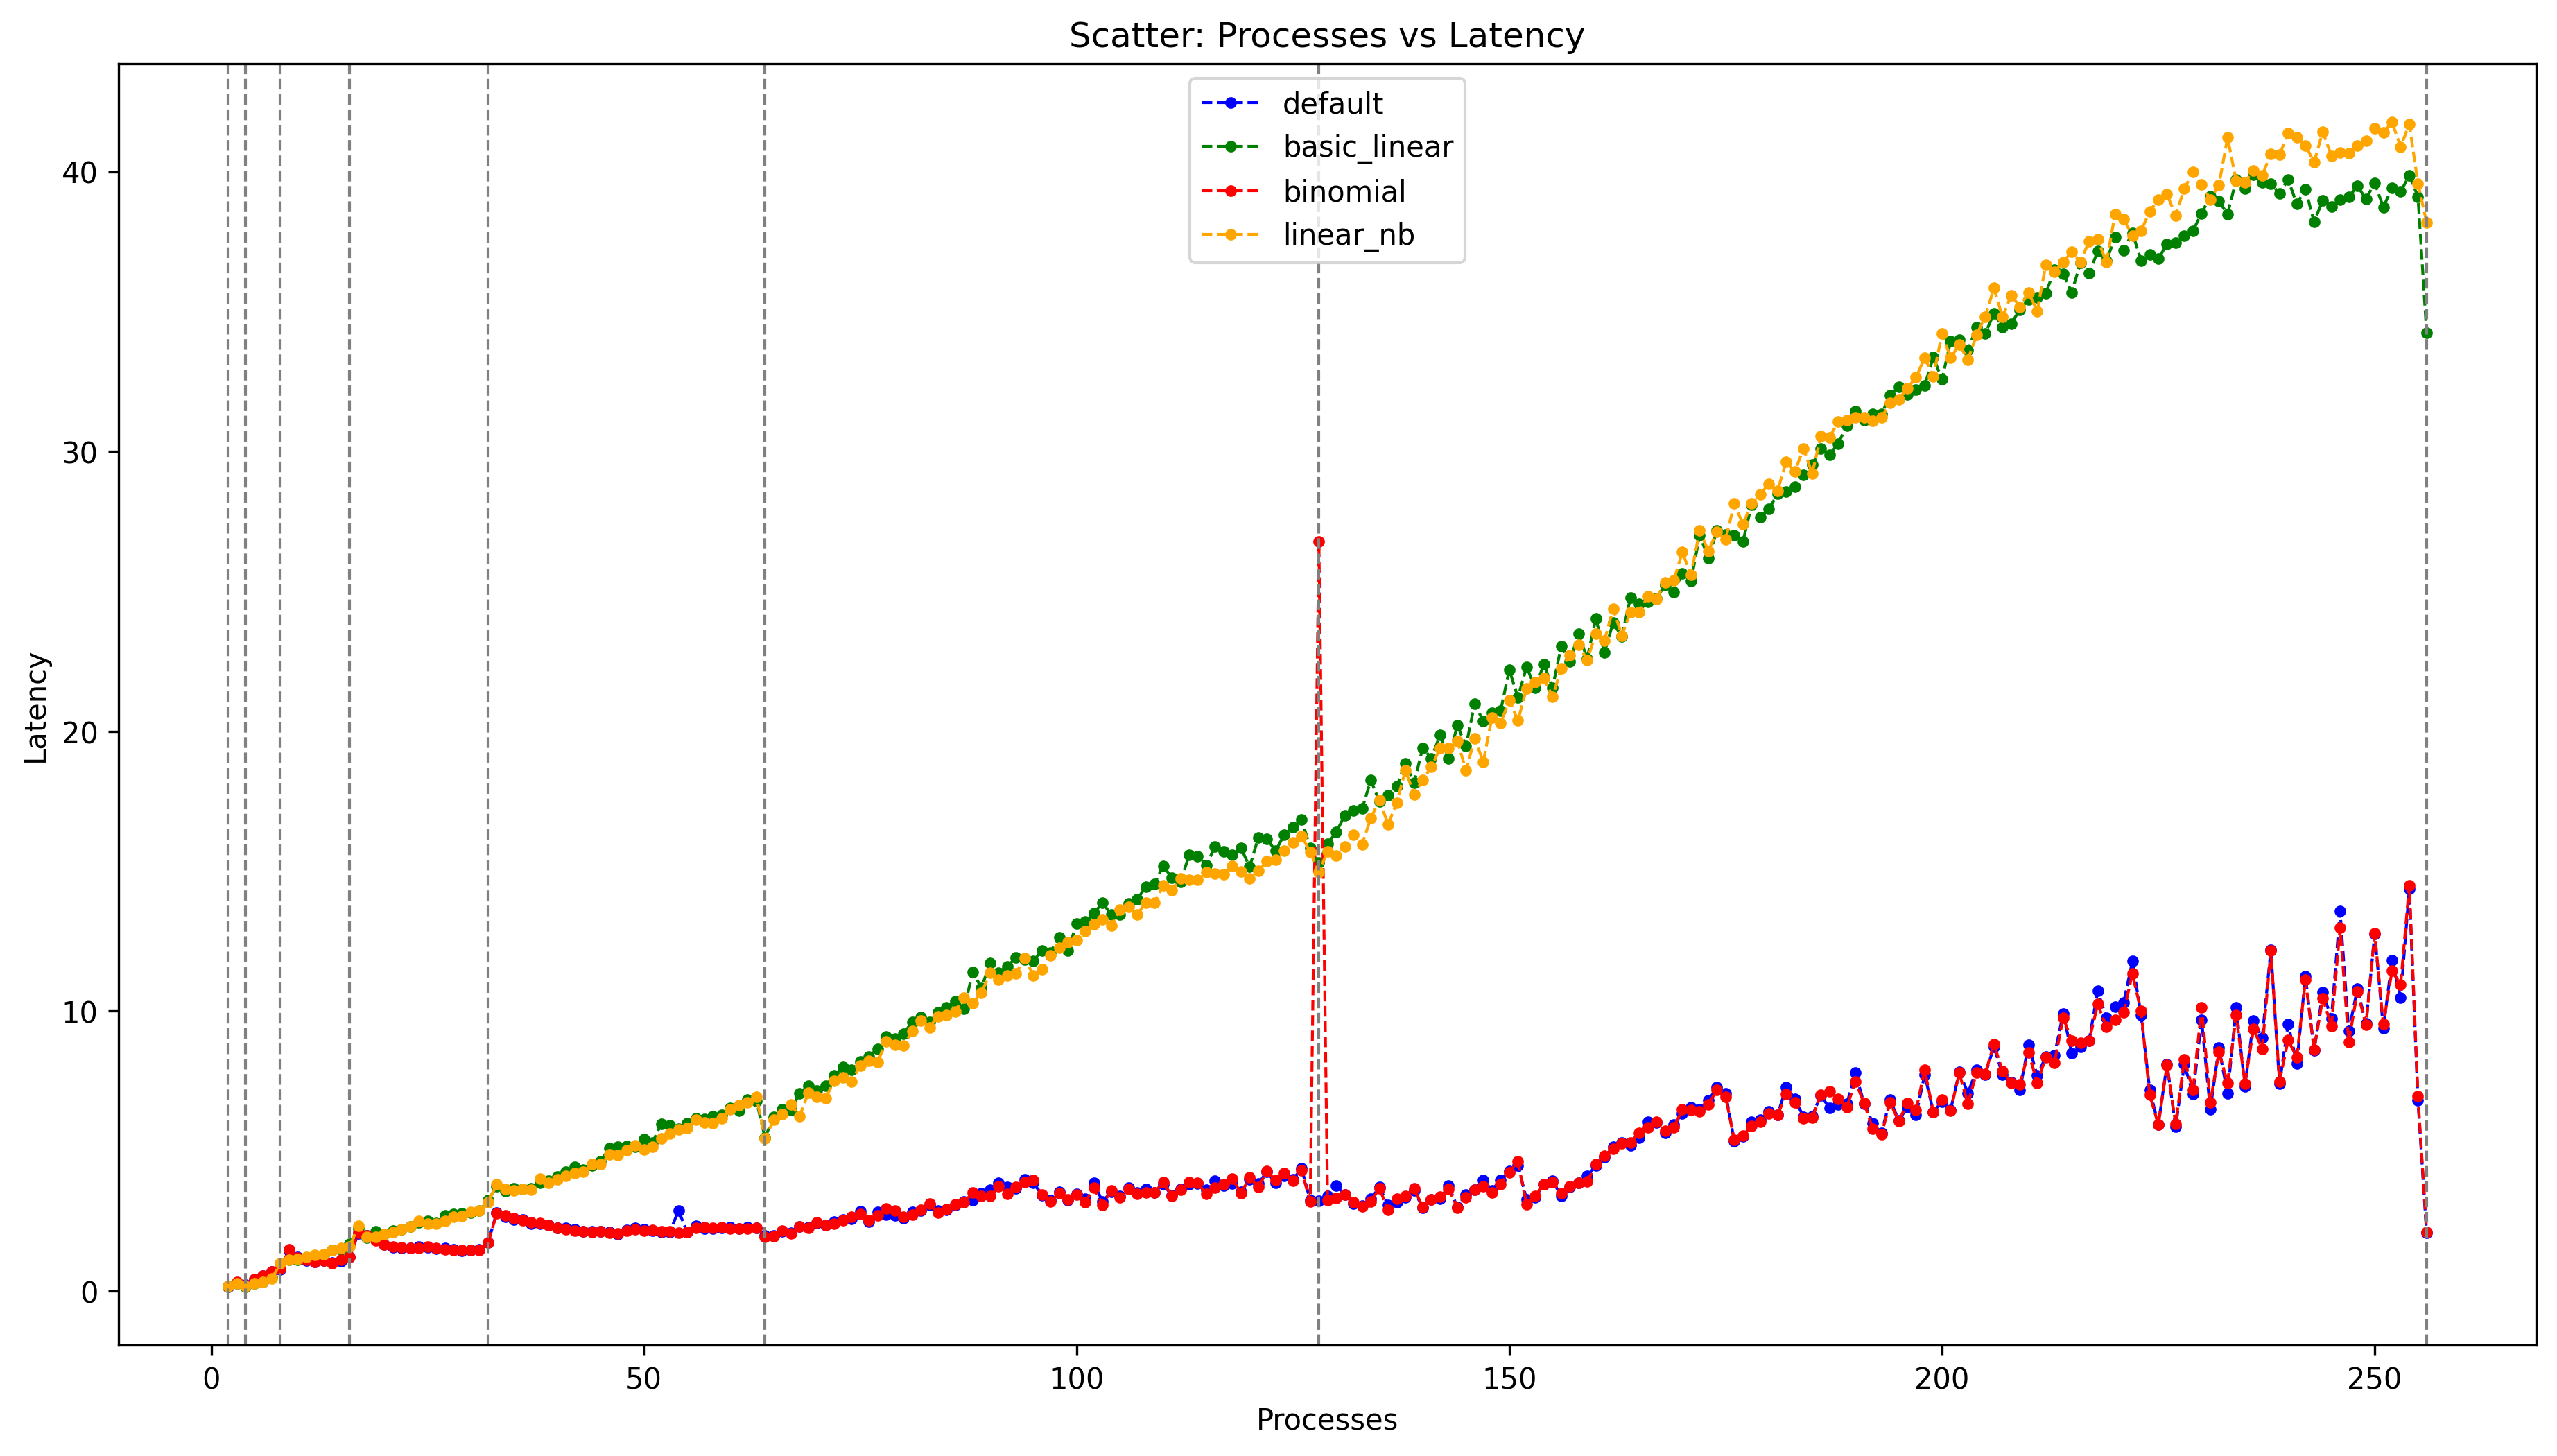

In [6]:
plt.figure(figsize=(15, 8), dpi=300)
# 1:"basic_linear", 2:"binomial", 3:"linear_nb"
plt.plot(df0['Processes'], df0['Latency'], marker='o', color='blue', linestyle='dashed', linewidth=1, markersize=3, label='default')
plt.plot(df1['Processes'], df1['Latency'], marker='o', color='green', linestyle='dashed', linewidth=1, markersize=3, label='basic_linear')
plt.plot(df2['Processes'], df2['Latency'], marker='o', color='red', linestyle='dashed', linewidth=1, markersize=3, label='binomial')
plt.plot(df3['Processes'], df3['Latency'], marker='o', color='orange', linestyle='dashed', linewidth=1, markersize=3, label='linear_nb')
for i in range(1, 9):
    plt.axvline(x=2**i, color='grey', linestyle='--', linewidth=1)
plt.xlabel('Processes')
plt.ylabel('Latency')
plt.title('Scatter: Processes vs Latency')
plt.legend(loc='upper center')
#plt.grid(True)
plt.show()

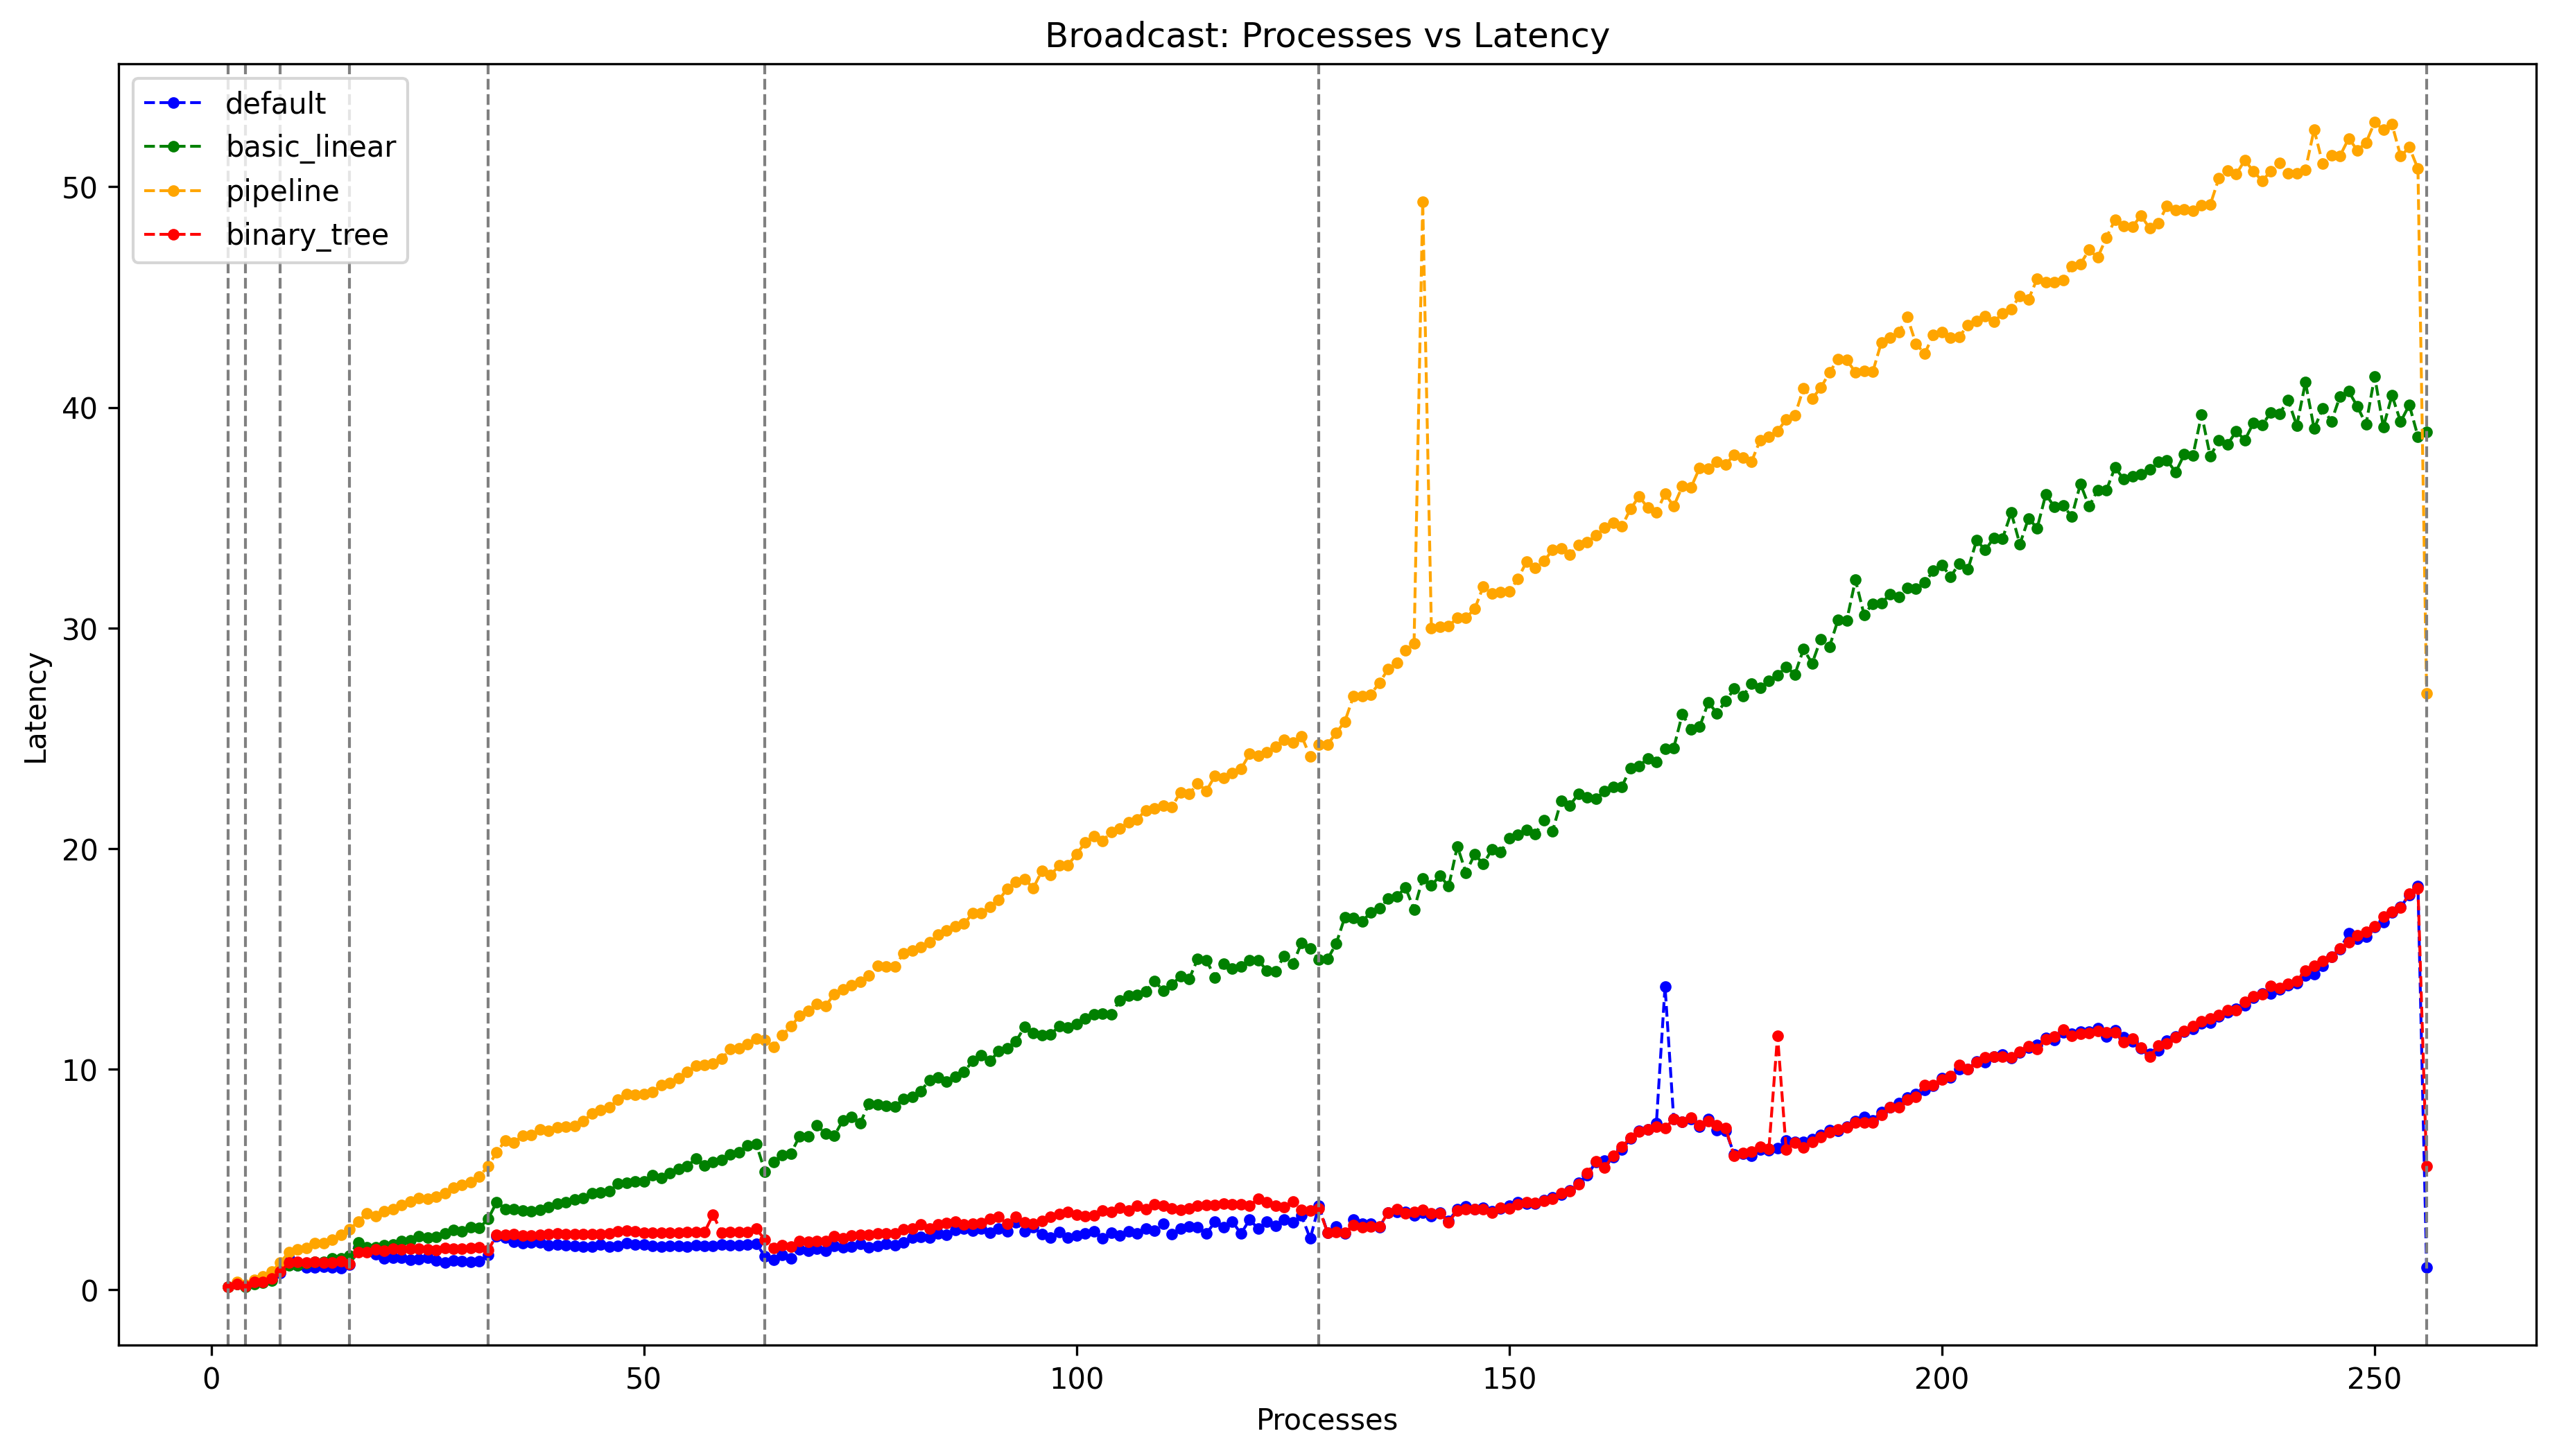

In [7]:
plt.figure(figsize=(15, 8), dpi=300)
plt.plot(b_df0['Processes'], b_df0['Latency'], marker='o', color='blue', linestyle='dashed', linewidth=1, markersize=3, label='default')
plt.plot(b_df1['Processes'], b_df1['Latency'], marker='o', color='green', linestyle='dashed', linewidth=1, markersize=3, label='basic_linear')
plt.plot(b_df3['Processes'], b_df3['Latency'], marker='o', color='orange', linestyle='dashed', linewidth=1, markersize=3, label='pipeline')
plt.plot(b_df5['Processes'], b_df5['Latency'], marker='o', color='red', linestyle='dashed', linewidth=1, markersize=3, label='binary_tree')
for i in range(1, 9):
    plt.axvline(x=2**i, color='grey', linestyle='--', linewidth=1)
plt.xlabel('Processes')
plt.ylabel('Latency')
plt.title('Broadcast: Processes vs Latency')
plt.legend(loc='upper left')
#plt.grid(True)
plt.show()

In [8]:
df_map0 = pd.read_csv('/Users/emanuele/Desktop/HPC_ex1/bcast0_core_mapping_epyc.csv')
df_map1 = pd.read_csv('/Users/emanuele/Desktop/HPC_ex1/bcast1_core_mapping_epyc.csv')
df_map3 = pd.read_csv('/Users/emanuele/Desktop/HPC_ex1/bcast3_core_mapping_epyc.csv')
df_map5 = pd.read_csv('/Users/emanuele/Desktop/HPC_ex1/bcast5_core_mapping_epyc.csv')

In [9]:
df_s_map0 = pd.read_csv('/Users/emanuele/Desktop/HPC_ex1/scatter0_core_mapping_epyc.csv')
df_s_map1 = pd.read_csv('/Users/emanuele/Desktop/HPC_ex1/scatter1_core_mapping_epyc.csv')
df_s_map2 = pd.read_csv('/Users/emanuele/Desktop/HPC_ex1/scatter2_core_mapping_epyc.csv')
df_s_map3 = pd.read_csv('/Users/emanuele/Desktop/HPC_ex1/scatter3_core_mapping_epyc.csv')

In [10]:
def map3d(df_map, title):
    # Riproviamo con una modifica dell'angolazione della visualizzazione per avere l'asse Z a sinistra

    fig = plt.figure(figsize=(10, 7), dpi=100)
    ax = fig.add_subplot(111, projection='3d')

    # Trasformazione logaritmica delle variabili 'Processes' e 'Size'
    x = np.log2(df_map['Processes'])
    y = np.log2(df_map['Size'])
    z = np.log2(df_map['Latency'])

    # Preparazione dei dati per interpolare il piano con variabili logaritmiche
    xi = np.linspace(x.min(), x.max(), 50)
    yi = np.linspace(y.min(), y.max(), 50)
    xi, yi = np.meshgrid(xi, yi)


    # Visualizzazione della superficie interpolata con una mesh triangolare
    ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='black', alpha=0.8)

    # Inversione dell'asse dei processi
    ax.set_xlim(ax.get_xlim()[::-1])

    # Personalizzazione dei tick con formattazione LaTeX
    process_ticks = np.arange(x.min(), x.max() + 1, 1)
    size_ticks = np.arange(0,19, 3)

    ax.set_xticks(process_ticks)
    ax.set_xticklabels([f"$2^{{{int(tick)}}}$" for tick in process_ticks])
    ax.set_yticks(size_ticks)
    ax.set_yticklabels([f"$2^{{{int(tick)}}}$" for tick in size_ticks])

    # Rotazione della vista per far apparire l'asse z sulla sinistra
    ax.view_init(elev=20, azim=320)

    # Etichette degli assi con formattazione LaTeX e barra dei colori
    ax.set_xlabel('Number of Processes')
    ax.set_ylabel('Message Size (bytes)')
    #ax.set_zlabel('log2(Avg Latency $(\\mu s)$)')
    colorbar = fig.colorbar(cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=z.min(), vmax=z.max())), 
                            ax=ax, label='$\\log_2$(Avg Latency $(\\mu s)$)')


    # Titolo come da esempio
    plt.title(title)
    plt.show()

In [11]:
def map3d_grid(df_maps, titles, colmap='viridis'):
    """
    Crea una griglia 2x2 di plot 3D per quattro diversi set di dati.
    
    Parametri:
        df_maps (list): Lista di quattro DataFrame contenenti i dati da plottare.
        titles (list): Lista di quattro titoli da usare per ciascun plot.
    """
    fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=180, subplot_kw={'projection': '3d'})
    axs = axs.flatten()  # Rende il vettore bidimensionale per una gestione più semplice degli assi
    #colmap = 'YlOrRd'#'cividis'  # Colormap per la visualizzazione dei dati
    for i, (df_map, title) in enumerate(zip(df_maps, titles)):
        ax = axs[i]
        
        # Trasformazione logaritmica delle variabili 'Processes' e 'Size'
        x = np.log2(df_map['Processes'])
        y = np.log2(df_map['Size'])
        z = np.log2(df_map['Latency'])
        
        # Preparazione dei dati per interpolare il piano con variabili logaritmiche
        xi = np.linspace(x.min(), x.max(), 50)
        yi = np.linspace(y.min(), y.max(), 50)
        xi, yi = np.meshgrid(xi, yi)

        # Visualizzazione della superficie interpolata con una mesh triangolare
        ax.plot_trisurf(x, y, z, cmap=colmap, edgecolor='black', alpha=0.8)
        
        # Inversione dell'asse dei processi
        ax.set_xlim(ax.get_xlim()[::-1])
        
        # Personalizzazione dei tick con formattazione LaTeX
        process_ticks = np.arange(x.min(), x.max() + 1, 1)
        size_ticks = np.arange(0, 19, 3)
        
        ax.set_xticks(process_ticks)
        ax.set_xticklabels([f"$2^{{{int(tick)}}}$" for tick in process_ticks])
        ax.set_yticks(size_ticks)
        ax.set_yticklabels([f"$2^{{{int(tick)}}}$" for tick in size_ticks])
        
        # Rotazione della vista per far apparire l'asse z sulla sinistra
        ax.view_init(elev=20, azim=320)
        
        # Etichette degli assi con formattazione LaTeX e barra dei colori
        ax.set_xlabel('Number of Processes', fontsize=7)
        ax.set_ylabel('Message Size (bytes)')
        
        # Barra dei colori
        mappable = cm.ScalarMappable(cmap=colmap, norm=plt.Normalize(vmin=z.min(), vmax=z.max()))
        mappable.set_array(z)
        fig.colorbar(mappable, ax=ax, label='$\\log_2$(Avg Latency $(\\mu s)$)', shrink=0.6, pad=0.15)
        
        # Titolo per ciascun plot
        ax.set_title(title)
    
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.4, hspace=0.3)

    plt.show()


In [12]:
# map3d(df_map0, "Broadcast Latency\nmap-by core, default algorithm")
# map3d(df_map1, "Broadcast Latency\nmap-by core, basic_linear algorithm")
# map3d(df_map3, "Broadcast Latency\nmap-by core, pipeline algorithm")
# map3d(df_map5, "Broadcast Latency\nmap-by core, binary_tree algorithm")
# map3d(df_s_map0, "Scatter Latency\nmap-by core, default algorithm")
# map3d(df_s_map1, "Scatter Latency\nmap-by core, basic_linear algorithm")
# map3d(df_s_map2, "Scatter Latency\nmap-by core, binomial algorithm")
# map3d(df_s_map3, "Scatter Latency\nmap-by core, linear_nb algorithm")

In [13]:
# scatter
sc_df_maps = [df_s_map0, df_s_map1, df_s_map2, df_s_map3]
sc_titles = ["Scatter Latency\nmap-by core, default algorithm", "Scatter Latency\nmap-by core, basic_linear algorithm", "Scatter Latency\nmap-by core, binomial algorithm",
           "Scatter Latency\nmap-by core, linear_nb algorithm 4"]
# broadcast
bc_df_maps = [df_map0, df_map1, df_map3, df_map5]
bc_titles = ["Broadcast Latency\nmap-by core, default algorithm", "Broadcast Latency\nmap-by core, basic_linear algorithm", "Broadcast Latency\nmap-by core, pipeline algorithm",
           "Broadcast Latency\nmap-by core, binary_tree algorithm"]

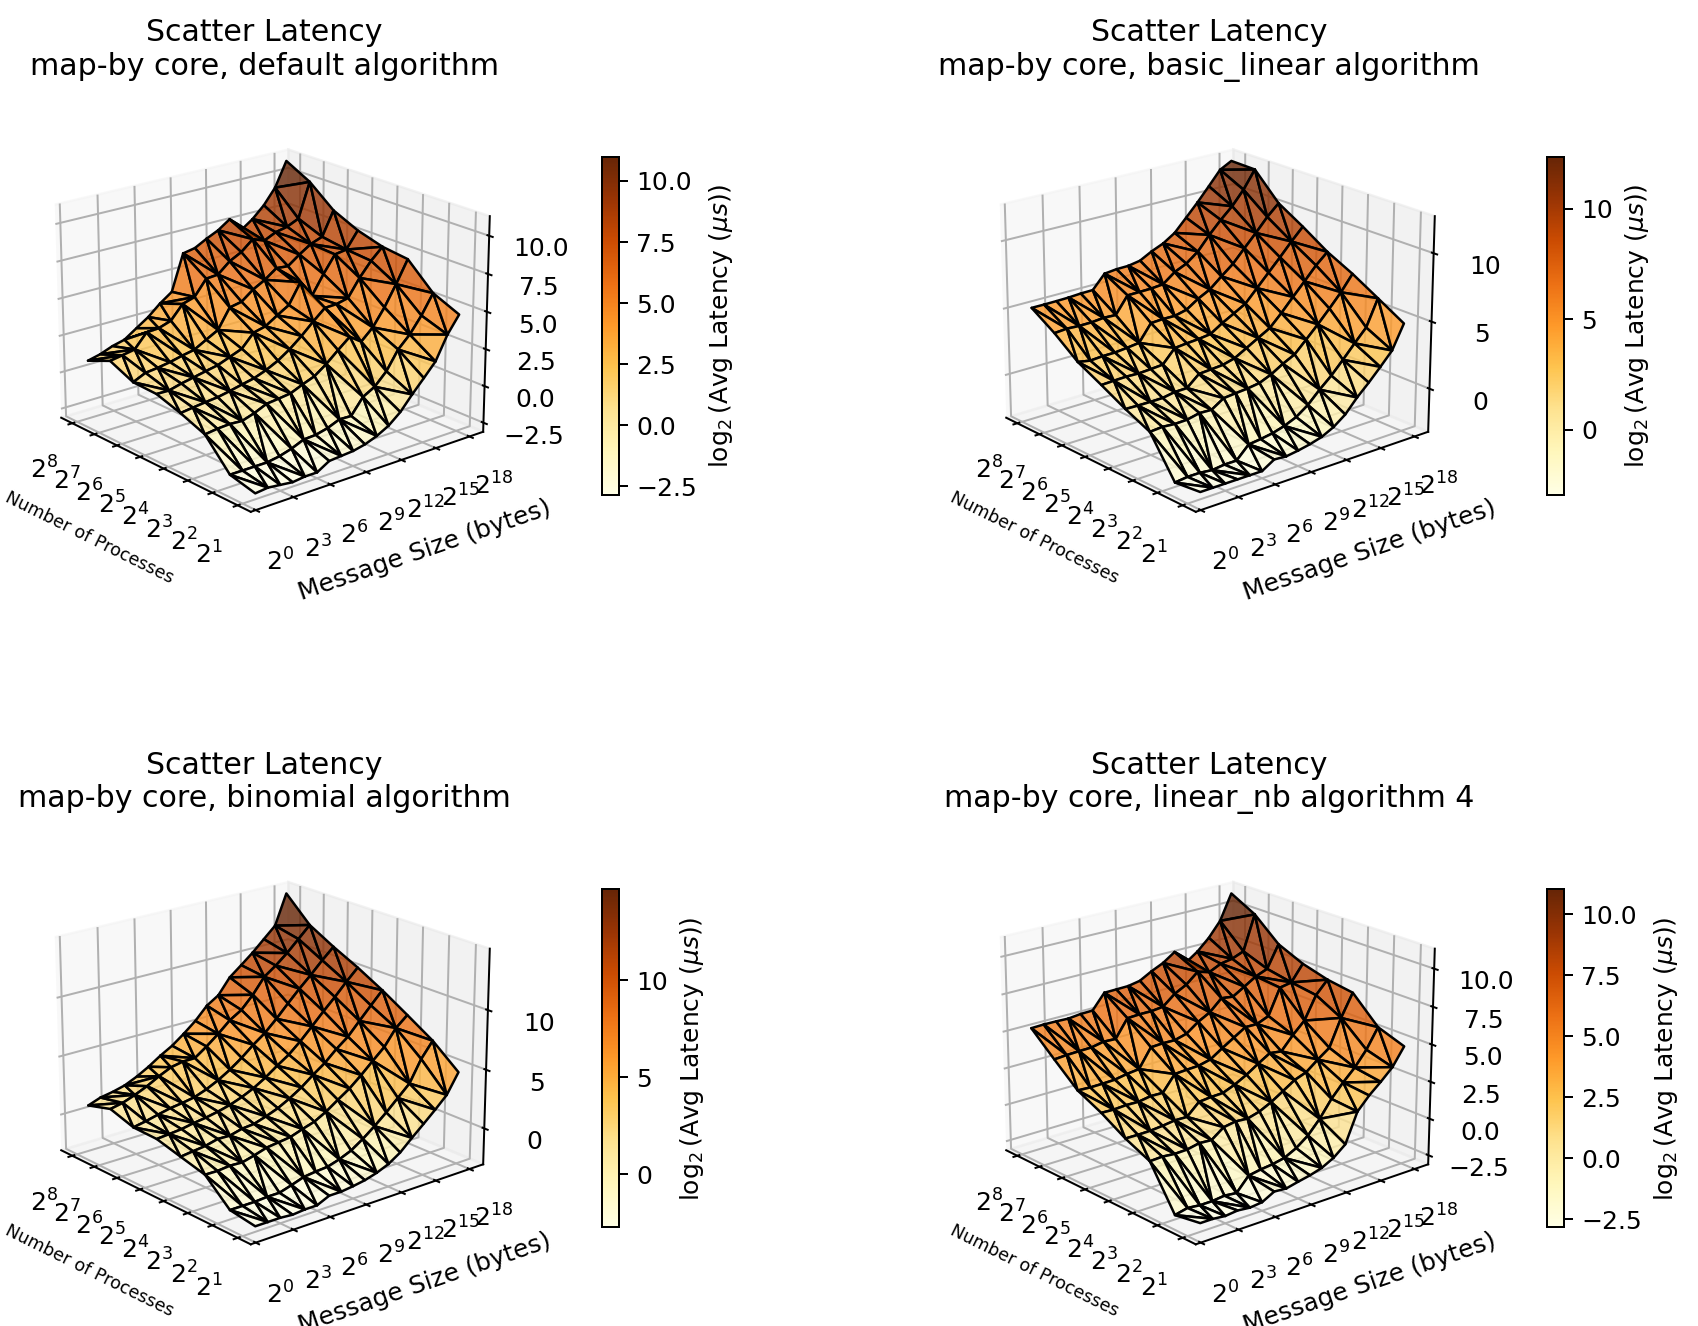

In [14]:
# mako, YlGnBu rocket YlOrRd YlOrBr
map3d_grid(sc_df_maps, sc_titles, 'YlOrBr')


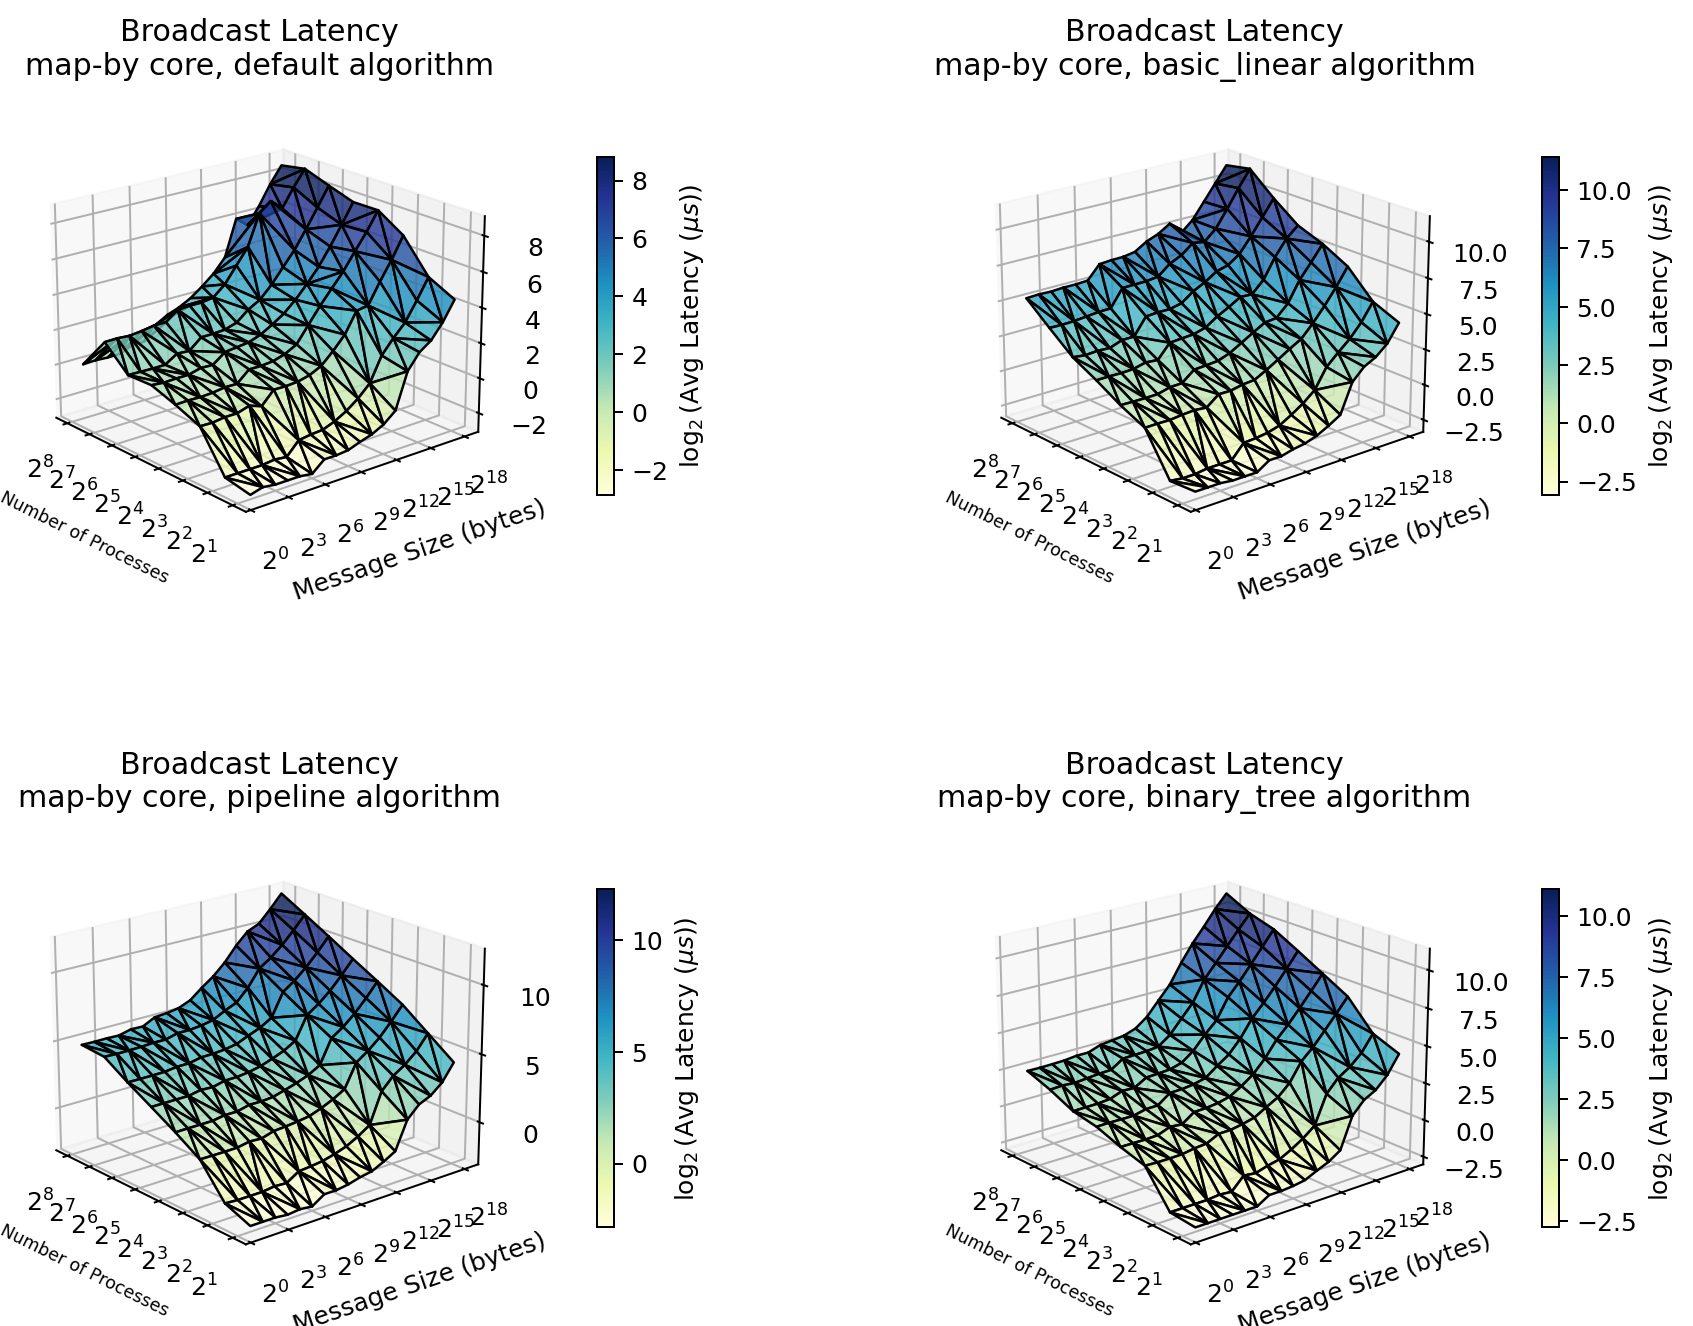

In [15]:
map3d_grid(bc_df_maps, bc_titles, 'YlGnBu')

'Accent', 'Accent_r', 
'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 
'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 
'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r',
 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r',
 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r',
 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r',
 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r',
 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r',
 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool',
 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r',
 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey',
 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',
 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r',
 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r',
 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r',
 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r',
 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r',
 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r',
 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [16]:
# Definiamo le latenze point-to-point
latency_p2p = {
    "same_CCX": 0.15,
    "same_CCD_different_CCX": 0.31,
    "same_NUMA": 0.34,
    "same_SOCKET": 0.36,
    "different_SOCKET": 0.65,
    "different_NODE": 1.82
}

# Questa funzione determina la relazione tra due core (i, i+1)
def determine_latency(i, j):
    # Simuliamo la logica della topologia dei core
    # e assegniamo la latenza appropriata
    if i // 4 == j // 4:  # Supponiamo che i gruppi di 4 core siano nella stessa CCX
        return latency_p2p["same_CCX"]
    elif i // 8 == j // 8:  # Ogni 8 core si cambia CCX
        return latency_p2p["same_CCD_different_CCX"]
    elif i // 32 == j // 32:  # Ogni 32 core cambiano NUMA
        return latency_p2p["same_NUMA"]
    elif i // 64 == j // 64:  # Ogni 64 core cambiano SOCKET
        return latency_p2p["same_SOCKET"]
    elif i // 128 == j // 128:  # Ogni 128 core cambiano SOCKET
        return latency_p2p["different_SOCKET"]
    else:
        return latency_p2p["different_NODE"]

# Calcolo della latenza T(n) per ogni core da 0 a 256
def calculate_latency(n):
    total_latency = 0
    for i in range(n):
        total_latency += determine_latency(i, i+1)
    return total_latency

# Creiamo una lista con la latenza per ogni core da 0 a 256
pip_model = [calculate_latency(n) for n in range(256)]

In [17]:
# Definiamo le latenze point-to-point in microsecondi
latency_p2p = {
    "same_CCX": 0.15,
    "same_CCD_different_CCX": 0.31,
    "same_NUMA": 0.34,
    "same_SOCKET": 0.36,
    "different_SOCKET": 0.65,
    "different_NODE": 1.82
}

# Fattori di riduzione aggiornati per ottimizzare il modello basic_linear (solo per core <= 127)
reduction_factors = {
    "same_CCX": 0.4,             # 60% di riduzione se è nella stessa CCX
    "same_CCD_different_CCX": 0.5,  # 50% di riduzione se è nella stessa CCD ma diversa CCX
    "same_NUMA": 0.6,           # 40% di riduzione se è nella stessa NUMA
    "same_SOCKET": 0.7,         # 30% di riduzione se è nello stesso SOCKET
    "different_SOCKET": 0.75    # 25% di riduzione se è su socket differenti
}

# Costante additiva per migliorare l'inizio del modello
initial_offset = 1.0  # Valore di esempio, da adattare ai dati sperimentali

# Funzione per determinare la latenza tra due core i e j con ottimizzazione, inclusa la costante iniziale
def determine_optimized_latency(i, j):
    if i == 0 and j == 1:
        return initial_offset  # Aggiunge la costante iniziale solo una volta
    elif i // 4 == j // 4:
        return latency_p2p["same_CCX"] * reduction_factors["same_CCX"]
    elif i // 8 == j // 8:
        return latency_p2p["same_CCD_different_CCX"] * reduction_factors["same_CCD_different_CCX"]
    elif i // 32 == j // 32:
        return latency_p2p["same_NUMA"] * reduction_factors["same_NUMA"]
    elif i // 64 == j // 64:
        return latency_p2p["same_SOCKET"] * reduction_factors["same_SOCKET"]
    elif i // 128 == j // 128:
        return latency_p2p["different_SOCKET"] * reduction_factors["different_SOCKET"]
    else:
        return latency_p2p["different_NODE"]

# Funzione per calcolare la latenza non ottimizzata per core > 128
def determine_non_optimized_latency(i, j):
    if i // 4 == j // 4:
        return latency_p2p["same_CCX"]
    elif i // 8 == j // 8:
        return latency_p2p["same_CCD_different_CCX"]
    elif i // 32 == j // 32:
        return latency_p2p["same_NUMA"]
    elif i // 64 == j // 64:
        return latency_p2p["same_SOCKET"]
    elif i // 128 == j // 128:
        return latency_p2p["different_SOCKET"]
    else:
        return latency_p2p["different_NODE"]

q = 63
# Calcolo della latenza T(n) per ogni core da 0 a 256, con modello ottimizzato per core <= 127
# e non ottimizzato per core > 128
def calculate_hybrid_basic_linear_latency(n):
    total_latency = 0
    latencies = []  # Lista per salvare la latenza per ogni core da 0 a n
    
    # Prima calcoliamo la latenza fino al core 127 con il modello ottimizzato
    for i in range(q):
        total_latency += determine_optimized_latency(i, i+1)
        latencies.append(total_latency)  # Salva la latenza per ogni core fino a 127
    
    # Memorizziamo la latenza al core 127 come punto di partenza per core > 128
    base_latency_core_q = total_latency
    
    # Ora continuiamo con la latenza non ottimizzata per core > 128
    if n > q:
        total_latency = base_latency_core_q
        for i in range(q, n):
            total_latency += determine_non_optimized_latency(i, i+1)
            latencies.append(total_latency)  # Salva la latenza per ogni core da 128 in poi
    
    return latencies

# Creiamo una lista con la latenza per ogni core da 0 a 256 per il modello ibrido
hybrid_basic_linear_latencies = calculate_hybrid_basic_linear_latency(256)



In [18]:
# Definiamo le latenze point-to-point in microsecondi
latency_p2p = {
    "same_CCX": 0.15,
    "same_CCD_different_CCX": 0.31,
    "same_NUMA": 0.34,
    "same_SOCKET": 0.36,
    "different_SOCKET": 0.65,
    "different_NODE": 1.82
}

# Fattori di riduzione aggiornati per ottimizzare il modello basic_linear (solo per core <= 127)
reduction_factors = {
    "same_CCX": 0.3,             # 70% di riduzione se è nella stessa CCX
    "same_CCD_different_CCX": 0.5,  # 40% di riduzione se è nella stessa CCD ma diversa CCX
    "same_NUMA": 0.6,           # 40% di riduzione se è nella stessa NUMA
    "same_SOCKET": 0.7,         # 30% di riduzione se è nello stesso SOCKET
    "different_SOCKET": 0.75    # 25% di riduzione se è su socket differenti
}

# Costante additiva per migliorare l'inizio del modello
initial_offset = 1.0  # Valore di esempio, da adattare ai dati sperimentali

# Funzione per determinare la latenza tra due core i e j con ottimizzazione, inclusa la costante iniziale
def determine_optimized_latency(i, j):
    if i == 0 and j == 1:
        return initial_offset  # Aggiunge la costante iniziale solo una volta
    elif i // 4 == j // 4:
        return latency_p2p["same_CCX"] * reduction_factors["same_CCX"]
    elif i // 8 == j // 8:
        return latency_p2p["same_CCD_different_CCX"] * reduction_factors["same_CCD_different_CCX"]
    elif i // 32 == j // 32:
        return latency_p2p["same_NUMA"] * reduction_factors["same_NUMA"]
    elif i // 64 == j // 64:
        return latency_p2p["same_SOCKET"] * reduction_factors["same_SOCKET"]
    elif i // 128 == j // 128:
        return latency_p2p["different_SOCKET"] * reduction_factors["different_SOCKET"]
    else:
        return latency_p2p["different_NODE"]

# Funzione per calcolare la latenza non ottimizzata per core > 64
def determine_non_optimized_latency(i, j):
    if i // 4 == j // 4:
        return latency_p2p["same_CCX"]
    elif i // 8 == j // 8:
        return latency_p2p["same_CCD_different_CCX"]
    elif i // 32 == j // 32:
        return latency_p2p["same_NUMA"]
    elif i // 64 == j // 64:
        return latency_p2p["same_SOCKET"]
    elif i // 128 == j // 128:
        return latency_p2p["different_SOCKET"]
    else:
        return latency_p2p["different_NODE"]

# Calcolo della latenza T(n) per ogni core da 0 a 256, con modello ottimizzato per core <= 64
# e non ottimizzato per core > 64
def calculate_hybrid_basic_linear_latency(n):
    total_latency = 0
    latencies = []  # Lista per salvare la latenza per ogni core da 0 a n
    
    # Prima calcoliamo la latenza fino al core 64 con il modello ottimizzato
    for i in range(63):
        total_latency += determine_optimized_latency(i, i+1)
        latencies.append(total_latency)  # Salva la latenza per ogni core fino a 64
    
    # Memorizziamo la latenza al core 64 come punto di partenza per core > 64
    base_latency_core_63 = total_latency-1.5

    # Ora continuiamo con la latenza non ottimizzata per core > 64
    if n > 63:
        total_latency = base_latency_core_63
        for i in range(63, min(n, 127)):
            total_latency += determine_non_optimized_latency(i, i+1)
            latencies.append(total_latency)  # Salva la latenza per ogni core da 64 in poi
        
    base_latency_core_127 = total_latency - 3.5
    if n > 127:
        total_latency = base_latency_core_127
        for i in range(127, n):
            total_latency += determine_non_optimized_latency(i, i+1)
            latencies.append(total_latency)  # Salva la latenza per ogni core da 128 in poi
    return latencies

# Creiamo una lista con la latenza per ogni core da 0 a 256 per il modello ibrido
hybrid_basic_linear_latencies2 = calculate_hybrid_basic_linear_latency(256)


In [19]:
x = np.arange(256)

In [20]:
# Definiamo le latenze point-to-point
latency_p2p = {
    "same_CCX": 0.15,
    "same_CCD_different_CCX": 0.31,
    "same_NUMA": 0.34,
    "same_SOCKET": 0.36,
    "different_SOCKET": 0.65,
    "different_NODE": 1.82
}

# Funzione per determinare la latenza tra due core (i, j) in base alla topologia
def determine_latency(i, j):
    if i // 4 == j // 4:  # Supponiamo che i gruppi di 4 core siano nella stessa CCX
        return latency_p2p["same_CCX"]
    elif i // 8 == j // 8:  # Ogni 8 core si cambia CCX
        return latency_p2p["same_CCD_different_CCX"]
    elif i // 32 == j // 32:  # Ogni 32 core cambiano NUMA
        return latency_p2p["same_NUMA"]
    elif i // 64 == j // 64:  # Ogni 64 core cambiano SOCKET
        return latency_p2p["same_SOCKET"]
    elif i // 128 == j // 128:  # Ogni 128 core cambiano SOCKET
        return latency_p2p["different_SOCKET"]
    else:
        return latency_p2p["different_NODE"]

# Funzione per calcolare la latenza massima nel modello binary tree
def calculate_binary_tree_latency(n):
    import math
    total_latency = 0
    current_core = 0  # Partiamo dal core radice

    # Calcoliamo la latenza lungo il percorso massimo
    while (2 * current_core + 1) < n:
        left_child = 2 * current_core + 1
        right_child = 2 * current_core + 2
        
        # Consideriamo solo il figlio sinistro per costruire il percorso massimo (es. struttura a sinistra)
        total_latency += determine_latency(current_core, left_child)
        current_core = left_child

    return total_latency

# Creiamo una lista con la latenza per ogni core da 0 a 256 nel modello binary tree
binary_tree_latencies = [calculate_binary_tree_latency(n) for n in range(1, 257)]


In [21]:
import numpy as np
import math

# Definizione delle latenze in microsecondi
LATENCY_CCX = 0.15e-6
LATENCY_CCD_DIFF_CCX = 0.31e-6
LATENCY_NUMA = 0.34e-6
LATENCY_SOCKET = 0.36e-6
LATENCY_DIFF_SOCKET = 0.65e-6
LATENCY_DIFF_NODE = 1.82e-6

# Configurazioni topologiche
CCX = 4
NUMA = 16
SAME_SOCKET = 32
SOCKET = 64
NODE = 128

# Calcolo dei tempi di comunicazione tra core consecutivi
CHAIN_TIMES = np.zeros((255,), dtype=np.float32)
for i in range(255):
    j = i + 1
    if i // CCX == j // CCX:
        CHAIN_TIMES[i] = LATENCY_CCX
    elif i // NUMA == j // NUMA:
        CHAIN_TIMES[i] = LATENCY_CCD_DIFF_CCX
    elif i // SAME_SOCKET == j // SAME_SOCKET:
        CHAIN_TIMES[i] = LATENCY_NUMA
    elif i // SOCKET == j // SOCKET:
        CHAIN_TIMES[i] = LATENCY_SOCKET
    elif i // NODE == j // NODE:
        CHAIN_TIMES[i] = LATENCY_DIFF_SOCKET
    else:
        CHAIN_TIMES[i] = LATENCY_DIFF_NODE

# Calcolo della matrice dei tempi di comunicazione tra ogni coppia di core
MATRIX_TIMES = np.zeros((256, 256), dtype=np.float32)
for i in range(256):
    for j in range(256):
        if i == j:
            MATRIX_TIMES[i][j] = 0
        elif i // CCX == j // CCX:
            MATRIX_TIMES[i][j] = LATENCY_CCX
        elif i // NUMA == j // NUMA:
            MATRIX_TIMES[i][j] = LATENCY_CCD_DIFF_CCX
        elif i // SAME_SOCKET == j // SAME_SOCKET:
            MATRIX_TIMES[i][j] = LATENCY_NUMA
        elif i // SOCKET == j // SOCKET:
            MATRIX_TIMES[i][j] = LATENCY_SOCKET
        elif i // NODE == j // NODE:
            MATRIX_TIMES[i][j] = LATENCY_DIFF_SOCKET
        else:
            MATRIX_TIMES[i][j] = LATENCY_DIFF_NODE

# Funzioni per calcolare i figli sinistro e destro nell'albero binario
def succ_left(p):
    h = math.floor(math.log2(p + 1))
    if h == 0:
        i = 0
    else:
        i = 2 * (p - 2**h + 1) + p // (2**(h + 1) - 2)
    return 2**(h + 1) - 1 + i

def succ_right(p):
    h = math.floor(math.log2(p + 1))
    if h == 0:
        i = 0
    else:
        i = 2 * (p - 2**h + 1) + p // (2**(h + 1) - 2)
    return 2**h + 2**(h + 1) - 1 + i

# Fattori di penalità definiti nel paper
NON_OVERLAP_FACTOR = 0.4e-2 / 1e-6
TOTAL_PROC_FACTOR = 1.8e-4 #* 1e-6

# Funzione per calcolare la latenza totale utilizzando il modello binary tree
def bin_tree_latency(n_proc):
    time = 0
    for j in range(1, math.floor(math.log2(n_proc)) + 1):
        step_j = []
        for k in range(2**(j - 1) - 1, min(2**j - 1, n_proc)):
            left = succ_left(k)
            right = succ_right(k)
            if left < n_proc:
                step_j.append(MATRIX_TIMES[k][left])
            if right < n_proc:
                step_j.append(MATRIX_TIMES[k][right])
        # Aggiunge la latenza massima del livello j, considerando il fattore di non-sovrapposizione
        time += max(step_j) + 2**(j + 1) * NON_OVERLAP_FACTOR * max(step_j)
    # Aggiunge la penalità per il numero totale di processi
    time += n_proc**2 * TOTAL_PROC_FACTOR
    return time
n_proc = list(range(1, 257))
binary_tree_latencies_paper_model = np.array([bin_tree_latency(N) for N in n_proc])
# Calcolo della latenza per ogni numero di processi fino a 255


In [22]:
def succ_left(p):
  h = math.floor(math.log2(p+1))
  if h == 0:
    i = 0
  else:
    i = 2*(p-2**h+1) + p//(2**(h+1)-2)
  return 2**(h+1) - 1 + i

def succ_right(p):
  h = math.floor(math.log2(p+1))
  if h == 0:
    i = 0
  else:
    i = 2*(p-2**h+1) + p//(2**(h+1)-2)
  return 2**h + 2**(h+1) - 1 + i
# All measured in microseconds (1e^-6)
LATENCY_CCX = 0.15e-6
LATENCY_CCD_DIFF_CCX = 0.31e-6
LATENCY_NUMA = 0.34e-6
LATENCY_SOCKET = 0.36e-6
LATENCY_DIFF_SOCKET = 0.65e-6
LATENCY_DIFF_NODE = 1.82e-6

# 2 SOCKET
# 4 NUMA REGION x SOCKET
# 8 CCD x NUMA REGION
# 2 CCX x CCD

# Sizes
CCX = 4
NUMA = 16
SAME_SOCKET = 32
SOCKET = 64
NODE = 128

CHAIN_TIMES = np.zeros((255,), dtype=np.float32)
for i in range(255):
  j = i+1
  if i // CCX == j // CCX: CHAIN_TIMES[i] = LATENCY_CCX
  elif i // NUMA == j // NUMA: CHAIN_TIMES[i] = LATENCY_CCD_DIFF_CCX
  elif i // SAME_SOCKET == j // SAME_SOCKET: CHAIN_TIMES[i] = LATENCY_NUMA
  elif i // SOCKET == j // SOCKET: CHAIN_TIMES[i] = LATENCY_SOCKET
  elif i // NODE == j // NODE: CHAIN_TIMES[i] = LATENCY_DIFF_SOCKET
  else: CHAIN_TIMES[i] = LATENCY_DIFF_NODE

MATRIX_TIMES = np.zeros((255, 255), dtype=np.float32)
for i in range(255):
  for j in range(255):
    if i == j:
      MATRIX_TIMES[i][j] = 0
    elif i//4 == j//4:
      MATRIX_TIMES[i][j] = LATENCY_CCX
    elif i//16 == j//16:
      MATRIX_TIMES[i][j] = LATENCY_CCD_DIFF_CCX
    elif i//32 == j//32:
      MATRIX_TIMES[i][j] = LATENCY_NUMA
    elif i//64 == j//64:
      MATRIX_TIMES[i][j] = LATENCY_SOCKET
    elif i//128 == j//128:
      MATRIX_TIMES[i][j] = LATENCY_DIFF_SOCKET
    else:
      MATRIX_TIMES[i][j] = LATENCY_DIFF_NODE
NON_OVERLAP_FACTOR = .1e-2
TOTAL_PROC_FACTOR = .8e-4 * 1e-6
def bin_tree_latency(n_proc):
    time = 0
    for j in range(1, math.floor(math.log2(n_proc)) + 1):
        step_j = []
        for k in range(j - 1, math.floor(math.log2(n_proc))):
            left = succ_left(k)
            right = succ_right(k)
            step_j.append(MATRIX_TIMES[k][left] + MATRIX_TIMES[k][right])
            # step_j.append(MATRIX_TIMES[k][left])
            # step_j.append(MATRIX_TIMES[k][right])
        time += max(step_j) + 2**(j + 1) * NON_OVERLAP_FACTOR * max(step_j)
    time += n_proc**2 * TOTAL_PROC_FACTOR
    return time
n_proc = list(range(1, 256))
binary_tree_latencies_paper_model1 = np.array([bin_tree_latency(N) for N in n_proc])
binary_tree_latencies_paper_model1 *= 10**6

In [23]:
y = np.arange(255)

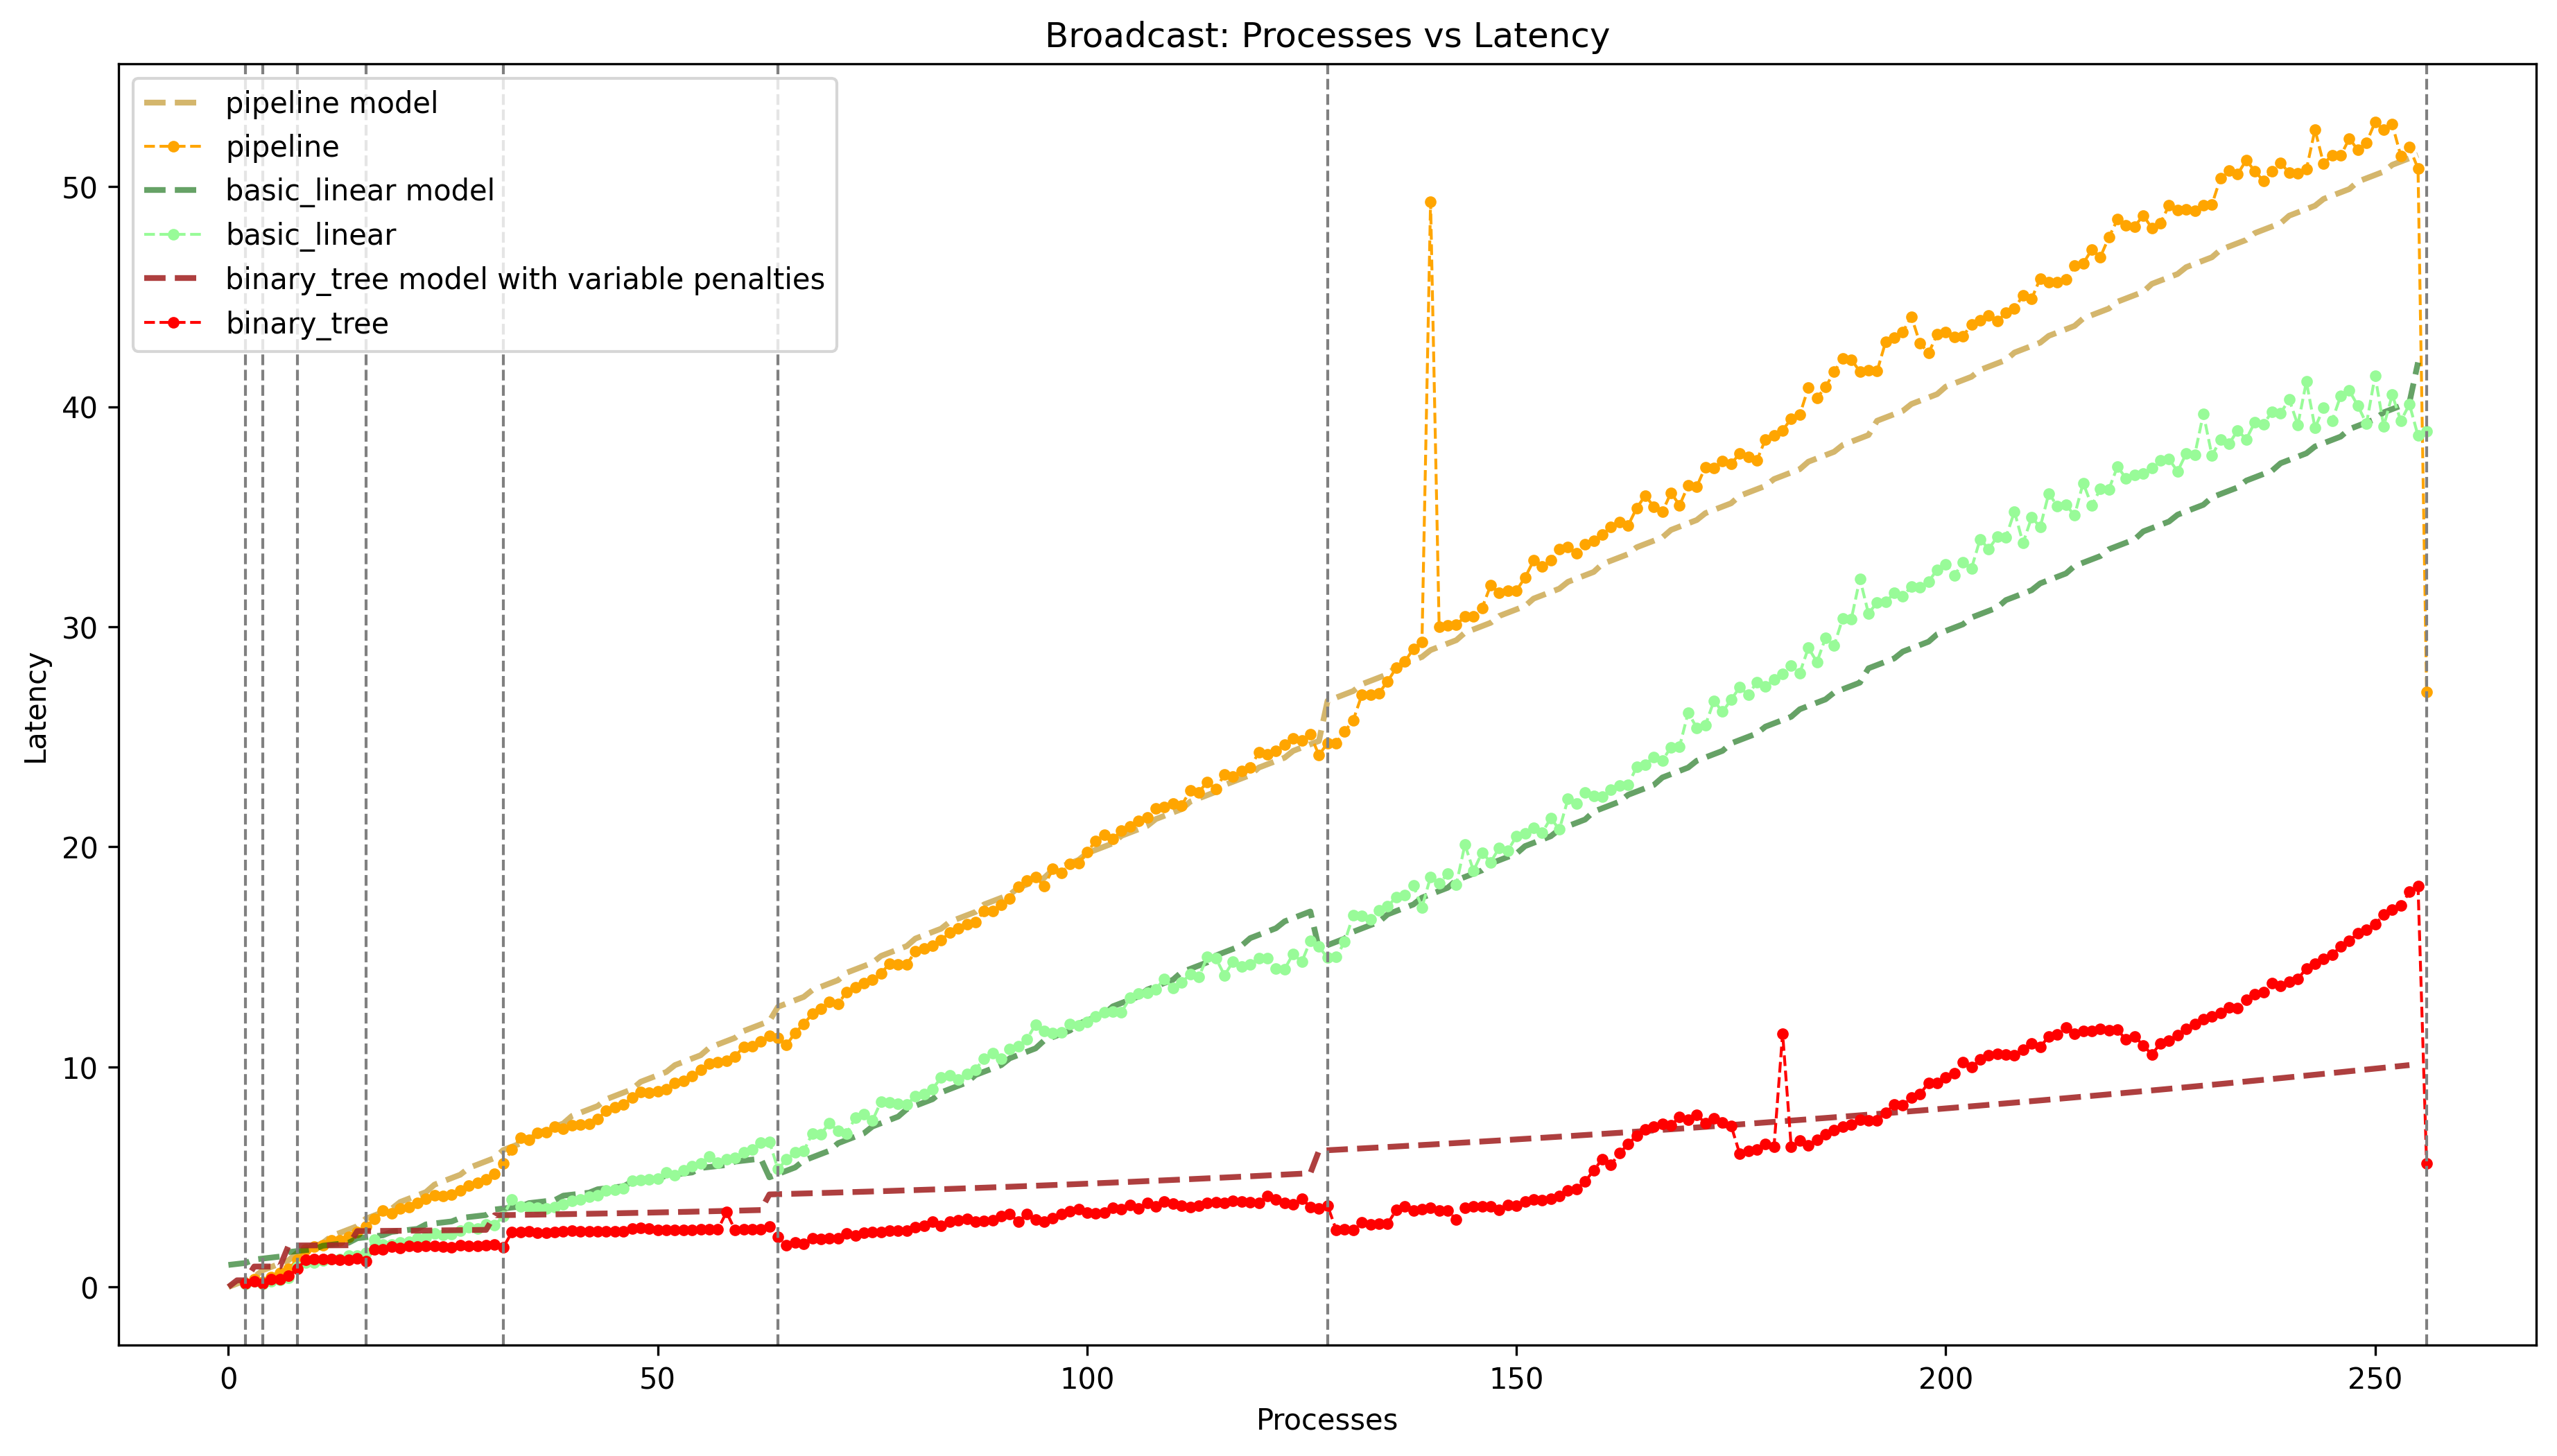

In [24]:
plt.figure(figsize=(15, 8), dpi=300)
plt.plot(x, pip_model, marker='', color='darkgoldenrod', linestyle='--', linewidth=2, label='pipeline model', alpha = 0.6)
plt.plot(b_df3['Processes'], b_df3['Latency'], marker='o', color='orange', linestyle='dashed', linewidth=1, markersize=3, label='pipeline')
#plt.plot(x, hybrid_basic_linear_latencies, marker='', color='red', linestyle='--', linewidth=2, label='basic_linear model', alpha = 0.8)
plt.plot(x, hybrid_basic_linear_latencies2, marker='', color='darkgreen', linestyle='--', linewidth=2, label='basic_linear model', alpha = 0.6)
plt.plot(b_df1['Processes'], b_df1['Latency'], marker='o', color='palegreen', linestyle='dashed', linewidth=1, markersize=3, label='basic_linear')
#plt.plot(x, binary_tree_latencies, marker='', color='blue', linestyle='--', linewidth=2, label='binary_tree model', alpha = 0.6)
#plt.plot(x, binary_tree_latencies_with_penalty, marker='', color='purple', linestyle='--', linewidth=2, label='binary_tree model with penalties', alpha = 0.6)
#plt.plot(x, binary_tree_latencies_paper_model, marker='', color='brown', linestyle='--', linewidth=2, label='binary_tree model with variable penalties', alpha = 0.8)
plt.plot(y, binary_tree_latencies_paper_model1, marker='', color='brown', linestyle='--', linewidth=2, label='binary_tree model with variable penalties', alpha = 0.9) #ADRIANO
plt.plot(b_df5['Processes'], b_df5['Latency'], marker='o', color='red', linestyle='dashed', linewidth=1, markersize=3, label='binary_tree')

for i in range(1, 9):
    plt.axvline(x=2**i, color='grey', linestyle='--', linewidth=1)
plt.xlabel('Processes')
plt.ylabel('Latency')
plt.title('Broadcast: Processes vs Latency')
plt.legend(loc='upper left')


#plt.grid(True)
plt.show()